In [1]:
import random 

random.seed(42) 

In [45]:
N = 100  #number of samples 
M = 1   #number of features 

lr = 0.01 
epochs = 10000

In [69]:
X = [random.uniform(0, 10) for _ in range(N)] 
y = [random.uniform(0, 10) for _ in range(N)] 

In [82]:
def calculate_mse(w, b):
    mse = sum((y - (w * x + b))**2 for x, y in zip(X,y)) / N
    #print("Mean Squared Error: ", mse)
    return mse 
  
def batch_gradient_descent(lr = 0.01, epochs = 1000):
  w = 0
  b = 0 
  loss = [] 
  for epoch in range(epochs):
    dw = 0 
    db = 0
    for x_i, y_i in zip(X, y):
      dw +=  2 * x_i * ((w * x_i + b) - y_i)
      db += 2 *((w + x_i + b) - y_i)
      
    w = w - lr * (dw / N)
    b = b - lr * (db / N) 

    curr_mse = calculate_mse(w, b) 
    loss.append(curr_mse) 

    #if epoch > 0 and abs(loss[-1] - loss[-2]) < 1e-6:
      #print(f"Converged at iteration {epoch}")
  return w, b, loss

def stochastic_gradient_descent(lr = 0.01, epochs = 1000): 
  w = 0 
  b = 0
  loss = [] 
  for epoch in range(epochs):
    dw = 0 
    db = 0 
    for x_i, y_i in zip(X, y):
      dw += 2 * x_i * ((w * x_i + b) - y_i)
      db += 2 * ((w * x_i + b) - y_i)

      w = w - lr * (dw / N) 
      b = b - lr * (db / N) 
    
    curr_mse = calculate_mse(w, b) 
    loss.append(curr_mse) 
    #if epoch > 0 and abs(loss[-1] - loss[-2]) < 1e-6:
      #print(f"Converged at iteration {epoch}")
      
  return w, b, loss



In [86]:
print("====Batch Gradient Descent====")
w_1, b_1, loss_1 = batch_gradient_descent(lr = 0.01, epochs = 1000)
print(f"Final w: {w_1}, b: {b_1}")
mse_val_1 = calculate_mse(w_1, b_1) 
print("MSE: ", mse_val_1)

print("\n====Stochastic Gradient Descent====")
w_2, b_2, loss_2 = stochastic_gradient_descent(lr = 0.01, epochs = 1000)
print(f"Final w: {w_2}, b: {b_2}")
mse_val_2 = calculate_mse(w_2, b_2) 
print("MSE: ", mse_val_2)

====Batch Gradient Descent====
Final w: 0.8975573692163181, b: -0.3615971428909167
MSE:  14.300799565179805

====Stochastic Gradient Descent====
Final w: -0.02661722869750309, b: 4.798483558792565
MSE:  7.542869671917994


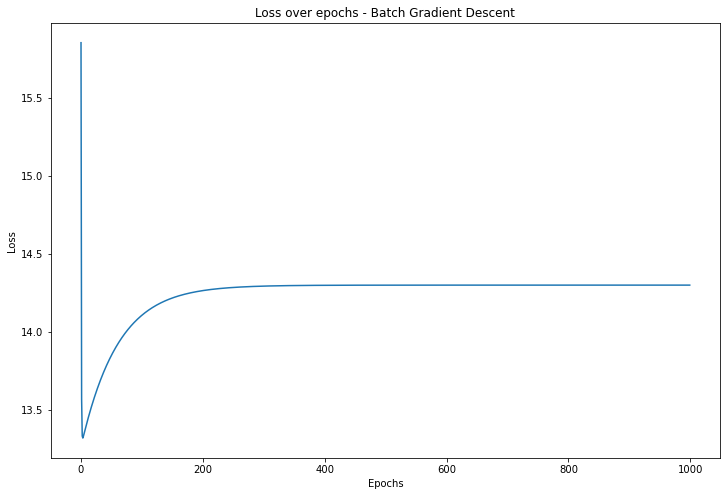

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8)) 
plt.plot(loss_1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs - Batch Gradient Descent')
plt.show()

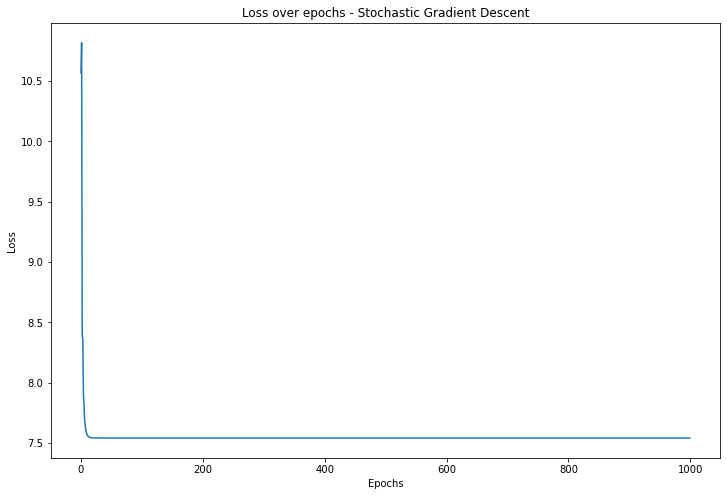

In [94]:
plt.figure(figsize=(12, 8)) 
plt.plot(loss_2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs - Stochastic Gradient Descent')
plt.show()

## Observations: 
From the loss vs epochs graphs between the two types of gradient descents these are the major observations: 

1. Both SGD and Batch GD have a initial sharp decrease in loss. 
2. Stochastic gradient descent seems to converge quicker than Batch gradient descent for a set of 100 values. 
3. Batch GD has a smooth curve towards convergence, while SGD's line is much more noisy. This is probably because the gradients are updated over every individual data point, here, Batch GD seems to have a much more stable convergence over SGD as SGD seems to fluctuate a little bit over the epochs. 
4. SGD performance seems to be better anyways, cause the MSE(SGD) <  MSE(Batch GD) 

What do we gotta do? 
1. SCALE IT UP!!!!!!!!!!! 